In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

In [2]:
data=pd.read_csv('Walmart Data Analysis.csv')

In [3]:
data.shape

(6435, 8)

In [4]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
data[data.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [7]:
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [8]:
data.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


In [11]:
data['Year']=pd.DatetimeIndex(data['Date']).year
data['Day']=pd.DatetimeIndex(data['Date']).day
data['Month']=pd.DatetimeIndex(data['Date']).month

In [28]:
data['Week']=pd.DatetimeIndex(data['Date']).week

C:\Users\Nikita\AppData\Local\Temp/ipykernel_23464/3650979856.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['Week']=pd.DatetimeIndex(data['Date']).week


In [12]:
data.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Day,Month
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12


Text(0.5, 1.0, 'Annual Sales')

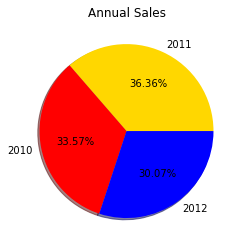

In [21]:
# Annual Sales
plt.pie(data['Year'].value_counts().values,labels=data['Year'].value_counts().index,autopct='%1.2f%%',shadow=True,
        colors=['gold','red','blue'])
plt.title('Annual Sales')

In [22]:
data.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Day,Month
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12


<AxesSubplot:xlabel='Store'>

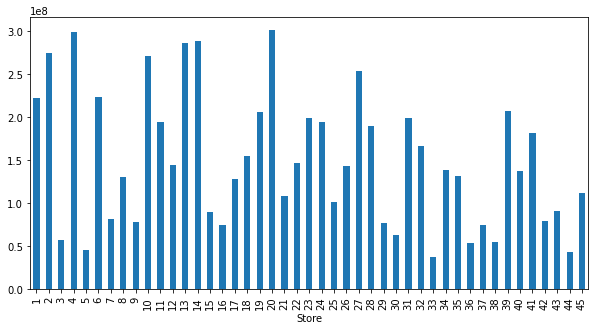

In [25]:
# which store has the highest weekly_sales?
plt.figure(figsize=(10,5))
data.groupby('Store')['Weekly_Sales'].sum().plot.bar()

In [26]:
data.head(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Day,Month
0,1,05-02-2010,1643690.9,0,42.31,2.572,211.096358,8.106,2010,2,5


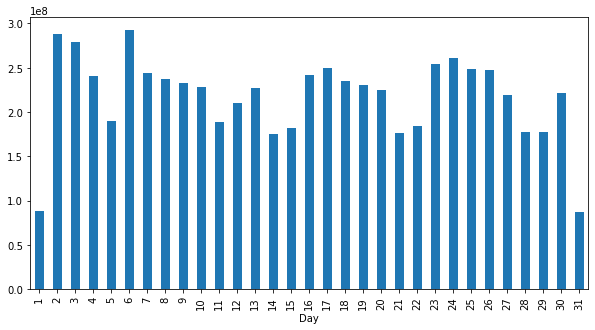

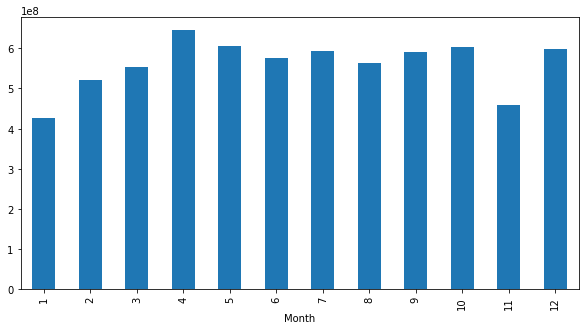

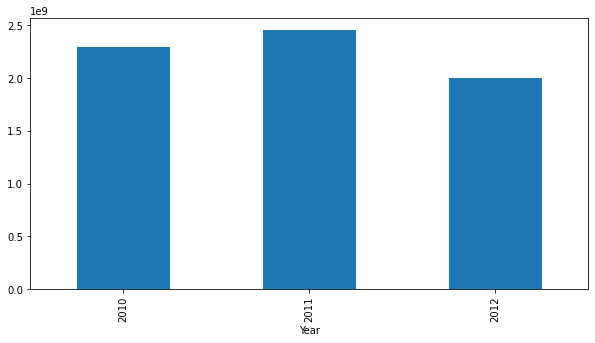

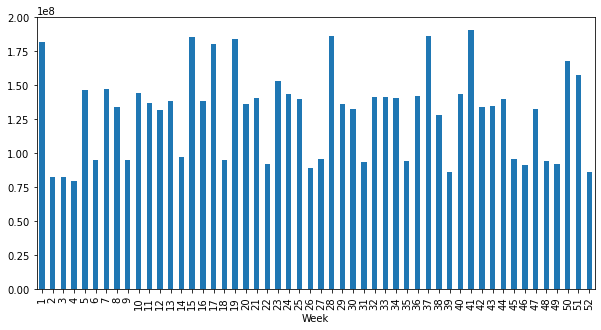

In [59]:
# Which date,week,month,year has highest wsales?
for f in ['Day','Month','Year','Week']:
    plt.figure(figsize=(10,5))
    data.groupby(f)['Weekly_Sales'].sum().plot.bar()
    plt.show()

<AxesSubplot:xlabel='Holiday_Flag'>

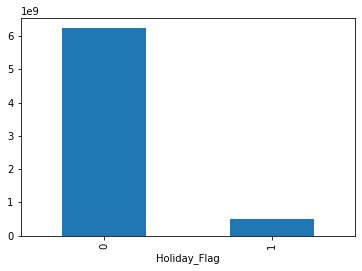

In [33]:
# Is holiday impacting wsales?
data.groupby('Holiday_Flag')['Weekly_Sales'].sum().plot.bar()

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Count'>

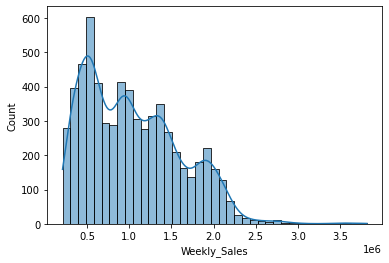

In [34]:
sns.histplot(x='Weekly_Sales',data=data,kde=True)

In [35]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Day,Month,Week
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,17
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,48
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,19,2,7
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,26,2,8
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,18


<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

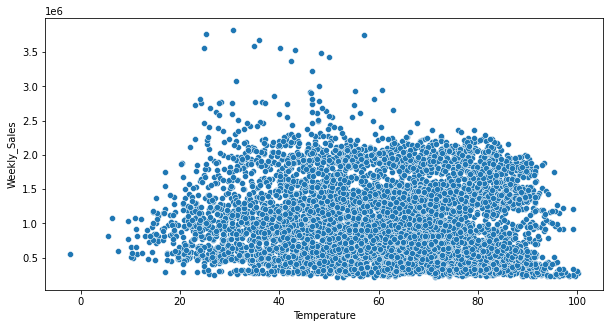

In [36]:
# how temp is corr with wsales?
plt.figure(figsize=(10,5))
sns.scatterplot(x='Temperature',y='Weekly_Sales',data=data)

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

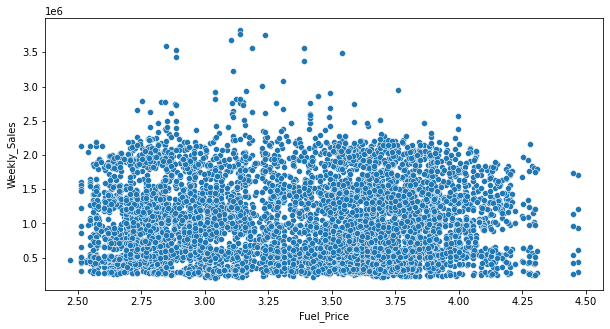

In [37]:
# Fuel vs wales
plt.figure(figsize=(10,5))
sns.scatterplot(x='Fuel_Price',y='Weekly_Sales',data=data)

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

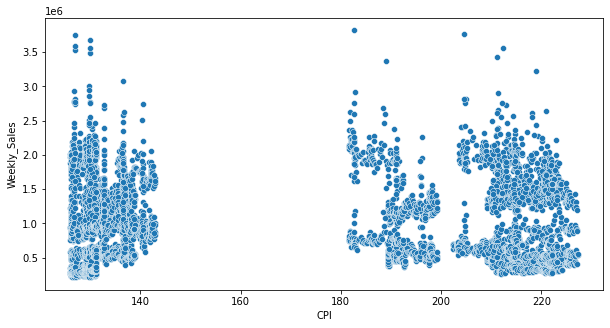

In [38]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='CPI',y='Weekly_Sales',data=data)

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

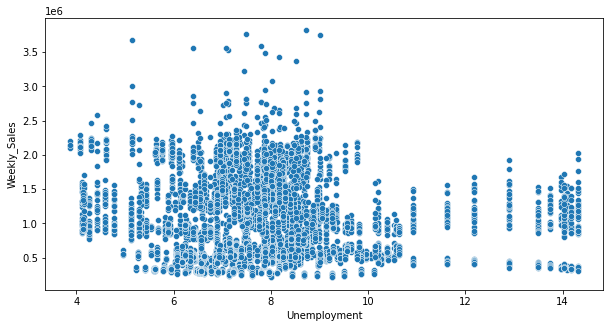

In [39]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Unemployment',y='Weekly_Sales',data=data)

In [ ]:
temp vs fuel vs wsales
CPI vs Unemp vs wsales
store vs holiday vs wsales
holiday vs fuelprice vs wsales



anual sales vs year
weekly sales vs year
CPI vs year

<AxesSubplot:>

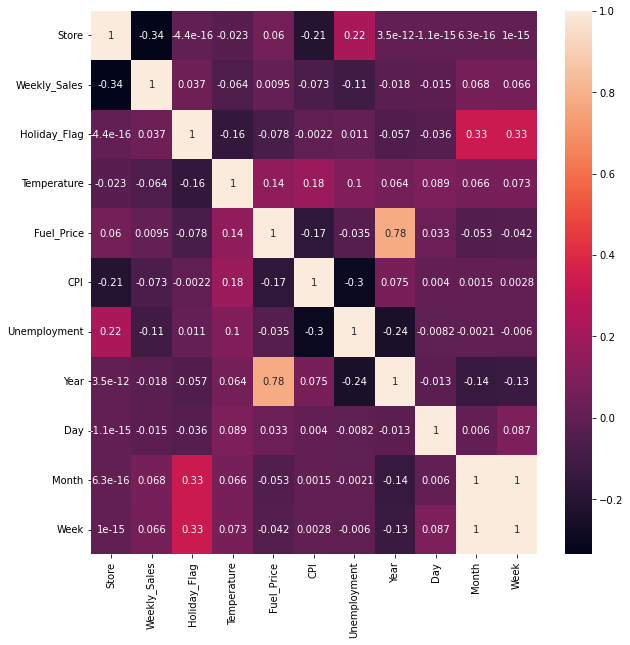

In [40]:
plt.figure(figsize=(10,10))
corr=data.corr()
#corrmat=corr.index
sns.heatmap(corr,annot=True)

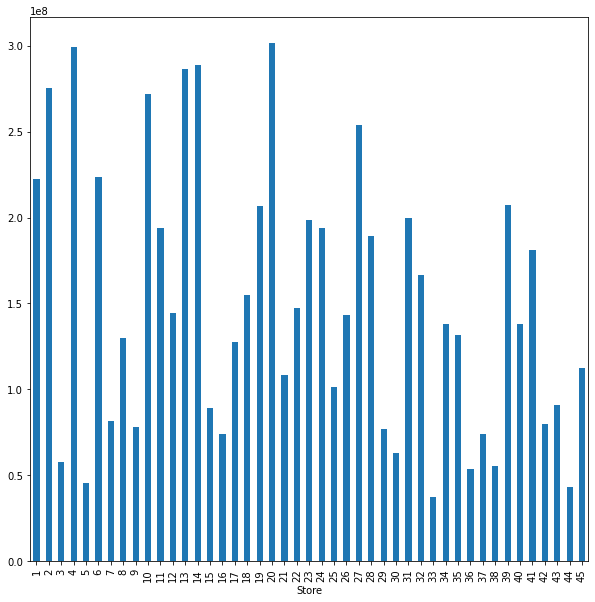

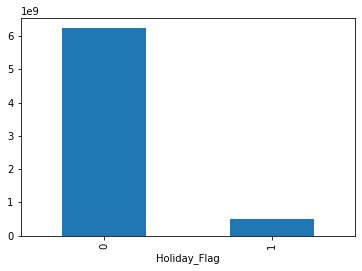

In [41]:
plt.figure(figsize=(10,10))
for f in ['Store','Holiday_Flag']:
    data.groupby(f)['Weekly_Sales'].sum().plot.bar()
    plt.show()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Year          6435 non-null   int64  
 9   Day           6435 non-null   int64  
 10  Month         6435 non-null   int64  
 11  Week          6435 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 603.4+ KB


In [47]:
cont_feat=[f for f in data.columns if data[f].dtypes=='float64']

In [48]:
cont_feat

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

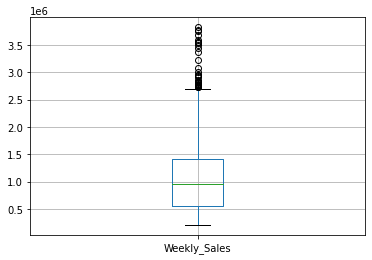

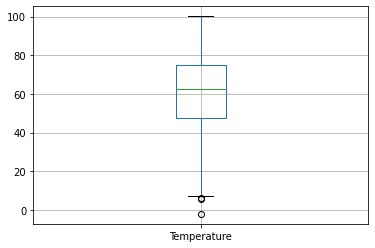

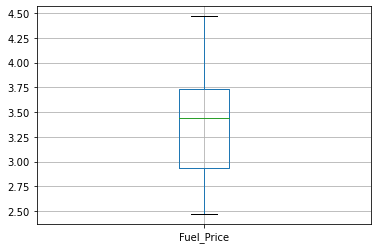

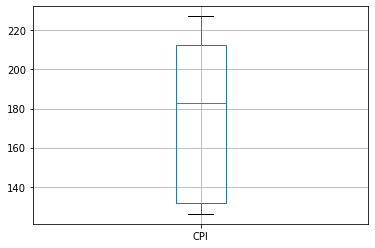

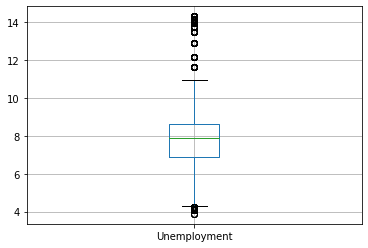

In [51]:
for f in cont_feat:
    data.boxplot(column=f)
    plt.show()

In [53]:
data.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Day,Month,Week
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,17
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,48


<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

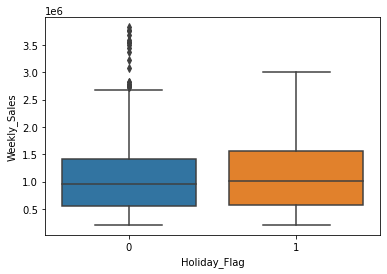

In [55]:
# Boxplot of weekly_sales by Holiday
sns.boxplot(x=data['Holiday_Flag'],y=data['Weekly_Sales'])

In [56]:
data.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Day,Month,Week
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,17
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,48


<AxesSubplot:xlabel='Year'>

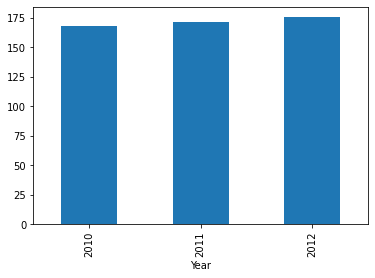

In [58]:
data.groupby('Year')['CPI'].mean().plot.bar()

In [60]:
data.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Day,Month,Week
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,17
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,48


<AxesSubplot:xlabel='Month'>

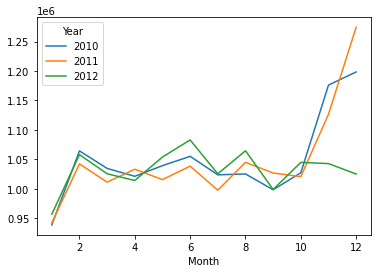

In [69]:
pd.pivot_table(data,index='Month',columns='Year',values='Weekly_Sales').plot()

<AxesSubplot:xlabel='Year'>

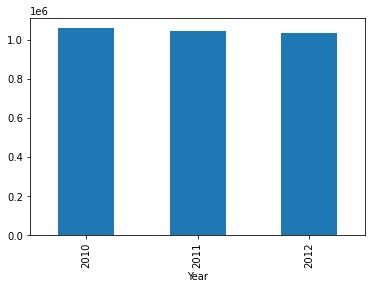

In [66]:
data.groupby('Year')['Weekly_Sales'].mean().plot.bar()

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Year          6435 non-null   int64  
 9   Day           6435 non-null   int64  
 10  Month         6435 non-null   int64  
 11  Week          6435 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 603.4+ KB


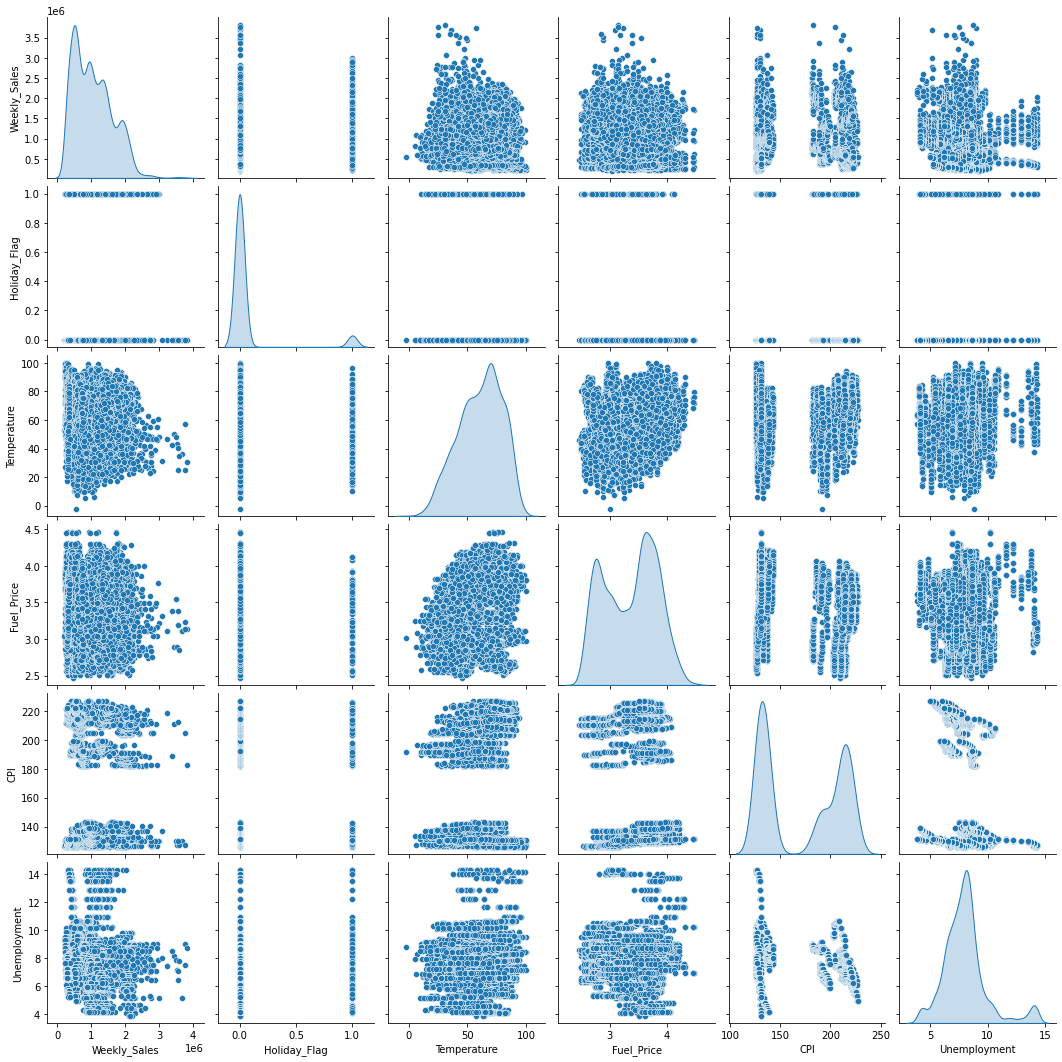

In [72]:
sns.pairplot(data[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']],diag_kind='kde')